# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

##1.1

In [1]:
! git clone https://github.com/ds4e/wrangling

Cloning into 'wrangling'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 63 (delta 9), reused 6 (delta 6), pack-reused 39 (from 1)
Receiving objects: 100% (63/63), 13.84 MiB | 4.39 MiB/s, done.
Resolving deltas: 100% (14/14), done.
Updating files: 100% (25/25), done.


In [2]:
!find /content -name "airbnb_hw.csv"


/content/wrangling/assignment/data/airbnb_hw.csv


In [3]:
import pandas as pd
import os
import numpy as np


df = pd.read_csv("/content/wrangling/assignment/data/airbnb_hw.csv")
df.head()


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [4]:
df["Price"].info()  # Check data types and missing values of Price

<class 'pandas.core.series.Series'>
RangeIndex: 30478 entries, 0 to 30477
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
30478 non-null  object
dtypes: object(1)
memory usage: 238.2+ KB


In [5]:
df["Price"] = df["Price"].astype(str).str.replace("$", "", regex=False)  # Remove dollar sign
df["Price"] = df["Price"].str.replace(",", "")  # Remove commas

df["Price"] = pd.to_numeric(df["Price"], errors="coerce", downcast="integer")  # Convert to integer

missing_values = df["Price"].isna().sum()
print(missing_values)


0


##1.2
 Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing?

In [6]:
df = pd.read_csv("/content/wrangling/assignment/data/mn_police_use_of_force.csv")
df.head()


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [7]:
missing_injury = df["subject_injury"].isna().sum() #remember quotation marks
print(missing_injury)

total_entries = df["subject_injury"].shape[0]
print(total_entries)

#9894/12925 of the data has missing data for subject_injury. This is an extreme concern! This is more than 75% of the entries.

9848
12925


In [8]:
df["subject_injury"] = df["subject_injury"].fillna("NaN")

cross_tab = pd.crosstab(df["subject_injury"], df["force_type"])
print(cross_tab) #For the more violent force types, there's barely any data provided on the injury
#This is so interesting because every type has something questionable to talk about.
#The Maximal Restraint Technique especially caught my eye because there has not been a single injury reported!

force_type      Baton  Bodily Force  Chemical Irritant  Firearm  \
subject_injury                                                    
NaN                 2          7051               1421        0   
No                  0          1093                131        2   
Yes                 2          1286                 41        0   

force_type      Gun Point Display  Improvised Weapon  Less Lethal  \
subject_injury                                                      
NaN                            27                 74           87   
No                             33                 34            0   
Yes                            44                 40            0   

force_type      Less Lethal Projectile  Maximal Restraint Technique  \
subject_injury                                                        
NaN                                  0                          170   
No                                   1                            0   
Yes                               

##1.3

In [9]:
from google.colab import files
uploaded = files.upload() #uploadpretrialdata

Saving VirginiaPretrialData2017Codebook.pdf to VirginiaPretrialData2017Codebook.pdf


In [10]:
!pip install pypdf2

import PyPDF2
pdf_path = "VirginiaPretrialData2017Codebook.pdf"

with open(pdf_path, "rb") as pdf_file:
    pdf_reader = PyPDF2.PdfReader(pdf_file)
    num_pages = len(pdf_reader.pages)

df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.6 MB/s eta 0:00:00


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


##1.4

**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [11]:
from google.colab import files
uploaded = files.upload() #Upload GSAF5 File


Saving GSAF5.xls to GSAF5.xls


In [12]:
import pandas as pd

df = pd.read_excel("GSAF5.xls")  # Adjust file name if necessary
df.head()  # Display first few rows


,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Peppino Fappani,M,69,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-12-29 00:00:00,2024.0,Unprovoked,Egypt,North of Marsa Alam,Red Sea,SCUBA Diving,Gianluca Di Gioia,M,48,...,Reportedly a Tiger Shark,Todd Smith : Kevin McMurray Trackingsharks .co...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df.head()  # Check data types and missing values

df = df.drop(columns=["pdf", "href formula", "href", "Case Number.1", "Case Number", "original order", "Unnamed: 21", "Unnamed: 22"])  # Drop unnecessary columns


In [14]:

df = df[df["Year"] >= 1940] # removes everything before 1940
df = df[df["Year"] != 2026] # removes 2026
df["Year"].describe()
#The medium of 2000 sggest that shark attacks have become more frequent. 1940-2000 is 60 years. 2000-2026 is 26 years

,Year
count,5455.000000
mean,1991.918790
std,24.077589
min,1940.000000
25%,1969.000000
50%,2000.000000
75%,2013.000000
max,2025.000000


[23 40 28 69 48 '60+' '?' 57 24 45 61 27 38 16 33 30 15 41 14 26
 'Middle age' 18 21 49 25 46 19 20 65 64 '13' nan '11' '46' '32' '29' '10'
 '64' '62' '39' '22' '15' '16' '21' '66' '52' '20' '44' '26' '47' '55'
 '30' '59' '8' '50' '45' '34' '38' '30s' '37' '9' '19' '20/30' '35' '65'
 '20s' '77' '60' '49' '42' '!2' '24' '73' '25' '18' '50s' '58' '67' '17'
 '14' '6' '41' '53' '68' '43' '40' '51' '31' 39 58 51 17 10 13 60 '40s' 68
 35 62 'teen' 8 22 32 56 'Teen' 12 42 36 37 50 'M' 9 11 34 '!6' 31 '!!' 47
 55 7 71 59 53 54 75 '45 and 15' 73 52 29 70 4 63 44 '28 & 22'
 '22, 57, 31' '60s' "20's" 43 67 74 '9 & 60' 'a minor' 6 3 82 66 72 '23'
 '12' '36' '63' '71' '48' '70' '18 months' '57' '7' '28' '33' '61' '74'
 '27' '3' '56' '28 & 26' '5' '54' '86' '18 or 20' '12 or 13' '46 & 34'
 '28, 23 & 30' 'Teens' 77 '36 & 26' '8 or 10' 84 '\xa0 ' ' ' '30 or 36'
 '6½' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' 5 ' 30' '7      &    31'
 ' 28' '20?' "60's" '69' '32 & 30' '16 to 18' '87' 'Elderly' 'mid-20s'


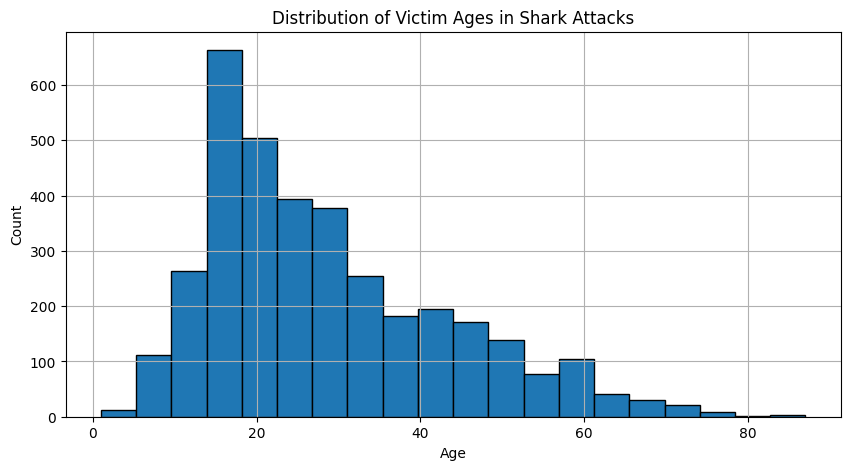

In [15]:
unique_age = df["Age"].unique()
df["Age"] = pd.to_numeric(df["Age"], errors="coerce")
print(unique_age)


import matplotlib.pyplot as plt
df["Age"].hist(bins=20, edgecolor="black", figsize=(10, 5))
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Distribution of Victim Ages in Shark Attacks")
plt.show()


In [16]:
df["Sex"] = df["Sex"].str.strip().str.upper()  # Remove spaces and makes upper case

male_proportion = df["Sex"].value_counts(normalize=True).get("M", 0)
print(male_proportion)

0.8586847891265241


In [17]:
df["Type"] = df["Type"].apply(lambda x: x if x in ["Provoked", "Unprovoked"] else "Unknown")
unprovoked_proportion = df["Type"].value_counts(normalize=True).get("Unprovoked", 0)
print(unprovoked_proportion)

0.7428047662694776


In [18]:
df["Fatal Y/N"] = df["Fatal Y/N"].apply(lambda x: x if x in ["Y", "N"] else "Unknown")

In [19]:
#Are sharks more likely to launch unprovoked attacks on men or women? Men
unprovoked_by_sex = df[df["Type"] == "Unprovoked"]["Sex"].value_counts(normalize=True)
print(unprovoked_by_sex)

#Is the attack more or less likely to be fatal when the attack is provoked or unprovoked?
#Less likely to be fatal when the attack is provoked
attack_type = df.groupby("Type")["Fatal Y/N"].value_counts(normalize=True).unstack()
print(attack_type)

#Is it more or less likely to be fatal when the victim is male or female?
#It's slightly more likely to be fatal when the victim is male
fatal_bysex = df.groupby("Sex")["Fatal Y/N"].value_counts(normalize=True).unstack()
print(fatal_bysex)

#How do you feel about sharks? I don't like sharks.

Sex
M      0.846587
F      0.153158
LLI    0.000256
Name: proportion, dtype: float64
Fatal Y/N          N   Unknown         Y
Type                                    
Provoked    0.953488  0.023256  0.023256
Unknown     0.413754  0.450958  0.135287
Unprovoked  0.818361  0.014067  0.167572
Fatal Y/N         N   Unknown         Y
Sex                                    
F          0.791489  0.085106  0.123404
LLI        1.000000       NaN       NaN
M          0.772579  0.076583  0.150838
M X 2           NaN  1.000000       NaN


In [20]:
df.columns = df.columns.str.strip()

df["Species"] = df["Species"].astype(str).str.lower()
whiteshark = df["Species"].str.contains("white shark").mean()
print(whiteshark)

0.12043996333638864


**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?

The 2020 US Census collected race data through self-identification on the questionnaire. It allowed responders to select more than one.

2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?

Race data contributes to allocation of federal funds, the guidance of public policies, and tracks disparities in health, education, and employment. Poor data quality can result in underrepresentation, resource misallocation, and ineffective policymaking.

3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?

The race data collection allowed multiple race selections and a write-in option. Some categories don't capture ethnic diversity (Middle Eastern/North African are not separate). A future improvement is better recognition of mixed-race identities. Future large scale surveys should separate sex and gender questions to include nonbinary identities to capture the diversity. Data collected could be richer if there was an increased outreach effort to include hard to reach populations.

4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.

The 2020 Census collected data on sex with a binary Male/Female question and did not ask about gender identity. The approach excluded nonbinary and transgender individuals, which limited the accuracy of gender-related data. A future improvement is to separate sex (biological) and gender (identity) to better reflect diversity. Additionally, a write-in option could allow more inclusive self-identification.

5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?

The privacy risks when handling sensitive information are inevitable because of how important this data is. Missing values can lead to bias if imputed incorrectly. Over-simplification can erase key differences, like grouping diverse races into one category. Ethical issues can also occur if incorrect assumptions are made about someone's identity.

6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?

The algorithms trained on biased data could reinforce stereotypes. Inferring protected characteristics can violate ethical and legal guidelines. The algorithm may not be able to recognize the fluidity of people's identities.